In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tshirt = pd.read_csv('Tshirt_Sizing_Dataset.csv')

In [3]:
tshirt.head(3)

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S


In [4]:
tshirt.tail(3)

,Height (in cms),Weight (in kgs),T Shirt Size
15,170,63,L
16,170,64,L
17,170,68,L


In [6]:
X = tshirt.drop('T Shirt Size',axis=1)

In [10]:
X.shape

(18, 2)

In [8]:
y = tshirt['T Shirt Size']

In [9]:
y

0     S
1     S
2     S
3     S
4     S
5     S
6     S
7     L
8     L
9     L
10    L
11    L
12    L
13    L
14    L
15    L
16    L
17    L
Name: T Shirt Size, dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
labelencoder_y = LabelEncoder()

In [13]:
y = labelencoder_y.fit_transform(y)

In [14]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [27]:
classifier.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
y_pred = classifier.predict(X_test)
y_pred


array([1, 1, 0, 0, 1, 0])

In [32]:
y_test

array([1, 1, 0, 1, 1, 0])

In [33]:
cm = confusion_matrix(y_test,y_pred)

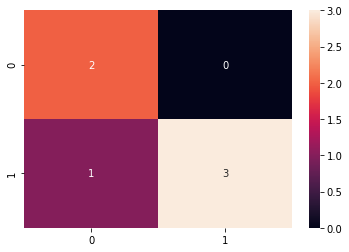

In [34]:
sns.heatmap(cm,annot=True)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.75      0.86         4

   micro avg       0.83      0.83      0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6

